Fake News Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import missingno as msno
import autoreload
import json
import csv
import sys
import os

from collections import defaultdict, Counter
from math import ceil, floor

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

#csv.field_size_limit(sys.maxsize)
csv.field_size_limit(100000000)

sb.set_style("darkgrid")
sb.set(font_scale = 1.2)

pd.set_option("display.max_rows", 10000)
pd.set_option("display.max_columns", 100)

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
df = pd.read_csv(r"D:\Open Classroom\Datasets\Fake News Dataset\fake_news_dataset.csv")
df.head(3)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias


Statistical Data for the DataFrame

In [3]:
df.shape

(12999, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12999 entries, 0 to 12998
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   uuid                12999 non-null  object 
 1   ord_in_thread       12999 non-null  int64  
 2   author              10575 non-null  object 
 3   published           12999 non-null  object 
 4   title               12319 non-null  object 
 5   text                12953 non-null  object 
 6   language            12999 non-null  object 
 7   crawled             12999 non-null  object 
 8   site_url            12999 non-null  object 
 9   country             12823 non-null  object 
 10  domain_rank         8776 non-null   float64
 11  thread_title        12987 non-null  object 
 12  spam_score          12999 non-null  float64
 13  main_img_url        9356 non-null   object 
 14  replies_count       12999 non-null  int64  
 15  participants_count  12999 non-null  int64  
 16  like

In [5]:
round(df.describe())

,ord_in_thread,domain_rank,spam_score,replies_count,participants_count,likes,comments,shares
count,12999.0,8776.0,12999.0,12999.0,12999.0,12999.0,12999.0,12999.0
mean,1.0,38093.0,0.0,1.0,2.0,11.0,0.0,11.0
std,6.0,26825.0,0.0,10.0,7.0,80.0,1.0,80.0
min,0.0,486.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,17423.0,0.0,0.0,1.0,0.0,0.0,0.0
50%,0.0,34478.0,0.0,0.0,1.0,0.0,0.0,0.0
75%,0.0,60570.0,0.0,0.0,1.0,0.0,0.0,0.0
max,100.0,98679.0,1.0,309.0,240.0,988.0,65.0,988.0


In [6]:
df.isnull().sum()

uuid                     0
ord_in_thread            0
author                2424
published                0
title                  680
text                    46
language                 0
crawled                  0
site_url                 0
country                176
domain_rank           4223
thread_title            12
spam_score               0
main_img_url          3643
replies_count            0
participants_count       0
likes                    0
comments                 0
shares                   0
type                     0
dtype: int64

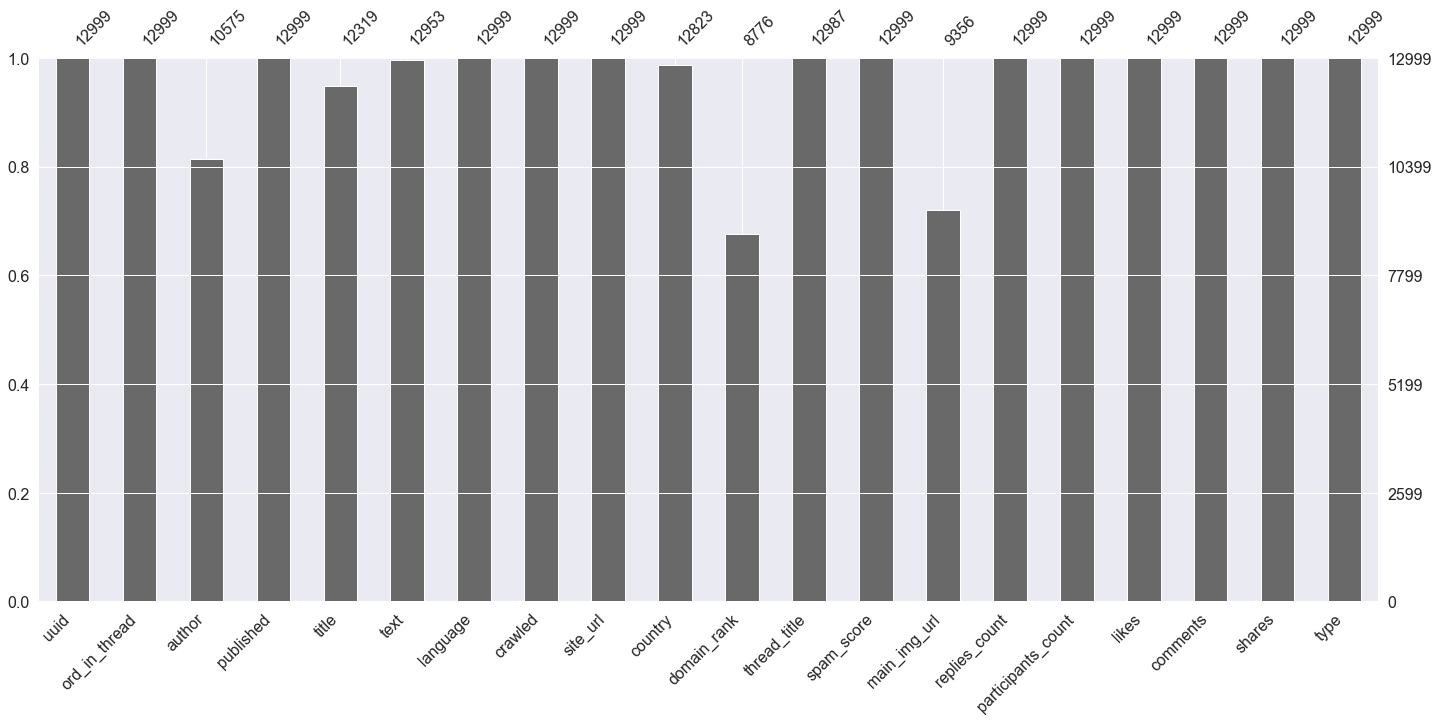

In [7]:
msno.bar(df)

DATA CLEANING

Drop Irrelevant columns

In [8]:
df.drop(columns = ["uuid", "site_url", "main_img_url"], inplace = True)
df.head(2)

,ord_in_thread,author,published,title,text,language,crawled,country,domain_rank,thread_title,spam_score,replies_count,participants_count,likes,comments,shares,type
0,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.0,0,1,0,0,0,bias
1,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.0,0,1,0,0,0,bias


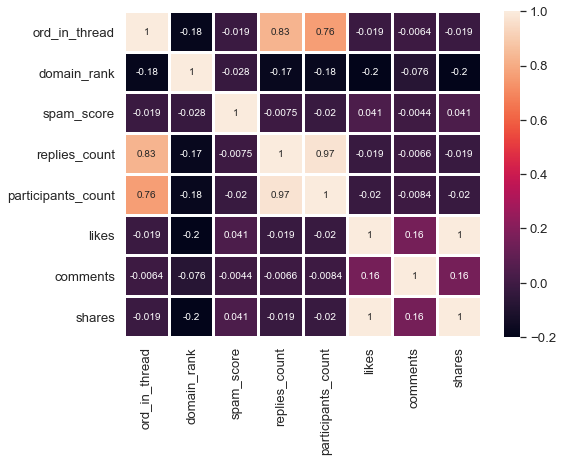

In [9]:
plt.figure(figsize = (8, 6))
sb.heatmap(df.corr(), annot = True, linewidths=2)

In [10]:
df["spam_score"] = df["spam_score"].astype(np.int64)
df["spam_score"].head()

0    0
1    0
2    0
3    0
4    0
Name: spam_score, dtype: int64

In [17]:
df[["text", "spam_score"]].to_json(r"D:\Open Classroom\Datasets\Fake News Dataset\fake_news_dataset.json")

Lod Data in JSON format

#### Classes

In [18]:
class ScoreText():
    genuine = "GENUINE"
    bias = "BIAS"
    fake = "FAKE"
    hate = "HATRED"
        
class Result():
    def __init__(self, text, score):
        self.text = text
        self.score = score
        self.remark_spam = self.get_spam()
    
    def get_spam(self):
        if self.score == 0:
            return ScoreText.genuine
        else:
            return ScoreText.fake

In [31]:

path = r"D:\Open Classroom\Datasets\Fake News Dataset\fake_news_dataset.json"
review = []

with open(path) as file:
    for line in file:
        rev = json.loads(line)
        review.append(Result(rev["text"], rev["spam_score"]))

print(review[0].get_spam())

FAKE


In [32]:
X, y = train_test_split(review, test_size = 0.33)

ValueError: With n_samples=1, test_size=0.33 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
print(training[0].get_spam())